# Example usage

To use `pyraingen` in a project:

```python
import pyraingen

print(pyraingen.__version__)
```

## Get Example Data

Use the built-in function `pyraingen.get_example_data()` to copy the datasets used for the below examples to the directory of your choice. The defeault is to copy the data to the current working directory. Do not change any of the file names.

```python
from pyraingen.get_example_data import get_example_data

get_example_data(daily=True, subdaily=True, ifd=True)
```

## Generate Daily Rainfall

NB: The `regionaliseddailysim` backend is written in fortran and must be compiled prior to using. A precompiled version for Python 3.8.5 on Windows 64 has been provided with the package, however, if you are using macOS or Linux you will have to use f2py to compile a version suitable for your operating system. If you are on windows it is highly recommened that you create an environment using python 3.8.5 and use the precompiled version. 
If you wish to use another version of python it will require you to compile a version suited to that python version. It is recommened that you use MSYS2 to download MinGW and then download the MinGW toolchain `mingw-w64-x86_64-toolchain` which contains the needed C and fortran compiler. Remeber to add the folder (e.g. `C:\msys64\mingw64\bin`) to your user environment variables path.

Use the inbuilt function `pyraingen.get_for_path()` to get the path to the fortran script and change, or point, to that directory to compile. Use the following commands in the cmd prompt.

`python -m numpy.f2py -c regionalised_daily.for -m regionalised_daily --fcompiler=gnu95 --compiler=mingw32`


Point to the location(s) where you have stored the example data. Please copy the `stn_record.dat` from the example daily data to the working directory where the `regionaliseddailysim` function will be executed from.

```python
from pyraingen.regionaliseddailysim import regionaliseddailysim

nyears = 50
startyear = 1967
nsim = 10
targetidx = 12345 
targetlat = -30.7670 
targetlon = 148.7420 
targetelev = 198.00 
targetdcoast = 366.80 
targetanrf = 515.28
targettemp = 26.10
data_path = "../src/pyraingen/data/example/daily/"
output_path_txt = "../src/pyraingen/data/example/subdaily/daily_012345.out"
output_path_nc ="../src/pyraingen/data/example/subdaily/daily_012345.nc"

regionaliseddailysim(nyears, startyear, nsim, targetidx, 
                    targetlat, targetlon, targetelev, 
                    targetdcoast, targetanrf, targettemp,
                    data_path, output_path_txt=output_path_txt, 
                    output_path_nc=output_path_nc)
```

## Perform Subdaily Disaggregation

Point to the location(s) where you have stored the example data.

```python
from pyraingen.regionalisedsubdailysim import regionalisedsubdailysim

fnameInput = "../src/pyraingen/data/example/subdaily/daily_012345.nc"
pathSubDaily = "../src/pyraingen/data/example/subdaily/"
pathIndex = "../src/pyraingen/data/example/subdaily/index_example.nc" 
pathCoeff = "../src/pyraingen/data/coefficients.dat"
targetIndex = 12345
fnameSubDaily = "../src/pyraingen/data/example/ifd/subdaily_012345.nc"

regionalisedsubdailysim(fnameInput, pathSubDaily, pathIndex,  
                        pathCoeff, targetIndex, fnameSubDaily=fnameSubDaily,
                        nSims = 10, gso3_lat=-30.7670, gso3_lon=148.7420,
                        gso3_elev=198.00, gso3_distcoast=366.80, 
                        gso3_anrf=515.28, gso3_temp=26.10)
```

When using `regionalisedsubdailysim` for applications other than the example use case, import and use the inbuilt functions `get_index()` and `get_coeffs()` to get the paths to data included as part of the `pyraingen` package that is necessary for it to run.

```python
from pyraingen.get_index import get_index
from pyraingen.get_coeffs import get_coeffs

pathIndex = get_index()
pathCoeff = get_coeffs()

```

## Constrain IFDs

`TargetIFD` data should be a csv file with size (rows = frequencies, cols = durations). No headers or row labels. Return periods should get smaller down the columns and durations should increase from left to right across the rows. E.g.

|  AEP (%) / duration (min) | 30 | 60 | 360 | 720 |
| --- | --- | --- | --- | --- |
| **2**  |     |    |     |    |
| **5**  |    |    |     |    |
| **10**  |    |    |     |    |
| **20**  |    |    |     |    |
| **50**  |    |    |     |    |
| **63.20** |    |    |     |    |

`TargetIFDdurationsEst` are all the durations present in the TargetIFD file. `TargetIFDdurations` are the durations you wish to condition. 

Point to the location(s) where you have stored the example data.

```python
from pyraingen.ifdcond import ifdcond

fileNameInput ="../src/pyraingen/data/example/ifd/subdaily_012345.nc"
fileNameOutput = "../src/pyraingen/data/example/ifd/cond_subdaily_012345.nc"
fileNameTargetIFD = "../src/pyraingen/data/example/ifd/012345_ifds.csv"
TargetIFDdurationsEst = [30, 60, 360, 720]
TargetIFDdurations = [30, 60, 360, 720]
AEP = [63.20, 50, 20, 10, 5, 2]

ifdcond(fileNameInput, fileNameOutput, fileNameTargetIFD, 
        nSims=10, TargetIFDdurationsEst=TargetIFDdurationsEst,
       TargetIFDdurations=TargetIFDdurations, AEP=AEP, plot=True)
```

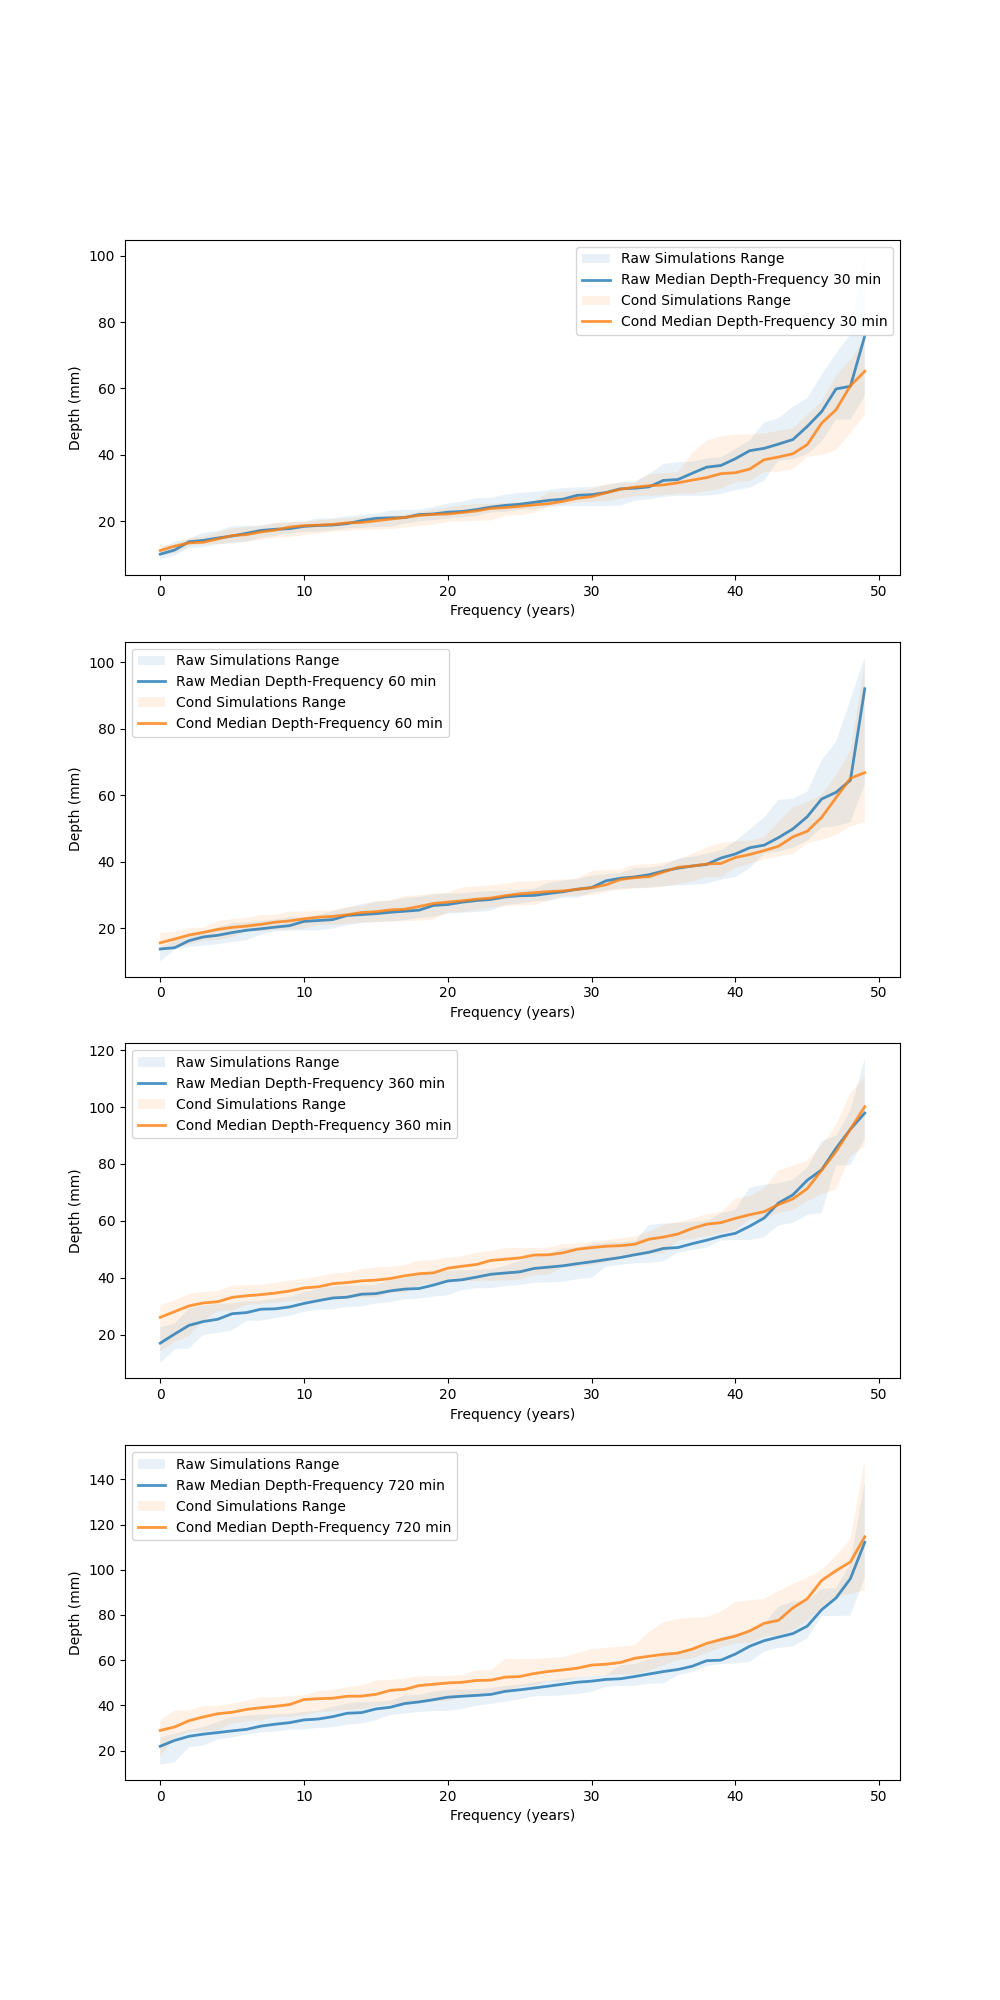